## 이미지 데이터 분류 : MNIST - 딥러닝 기본 프레임 만들기

- 총 60,000개의 학습셋과 10,000개의 테스트셋을 불러와 속성 값을 지닌 X, 클래스 값을 지닌 Y로 구분하는 작업

딥러닝 모델 구현  
(1) 모델 설정  
(2) 모델 컴파일  
(3) 모델 실행(학습)  
(4) 모델 평가

ModelCheckpoint() : 모델 성과 저장/로드   
EarlyStopping : 모델 최적화 단계에서 학습 자동 중단 설정     
모델 저장/로드

In [3]:
# 이미지 데이터 로드 및 전처리

from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 정규화
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

# 원-핫 인코딩 (바이너리화)
Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)

**딥러닝 적용(프레임 설정)**

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# (1) 모델 설정
model = Sequential()
model.add(Dense(512, input_shape = (784,), activation = 'relu')) # 은닉층
model.add(Dense(10, activation = 'softmax'))

##### 활성화 함수
- 은닉층 : relu
- 출력층 : softmax

    - relu 함수
        - x가 0보다 작을 때는 모든 값을 0으로 처리하고
        - 0보다 클 때는 x를 그대로 사용

    - softmax 함수 
        - 3개 이상으로 분류하는 다중 클래스 분류에서 사용하는 활성화 함수

In [5]:
# (2) 모델 컴파일
# 결정값ㅇ ㅣ원핫인코딩되어 있으므로
# 손실 함수(오차 함수) : categorical_crossentropy
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
# 최적화 알고리즘 : adam 
# Adam(Adaptive Moment Estimation)
# 각 파라미터마다 다른 크기의 업데이트를 적용하는 방법

##### 모델 성과 저장
- 모델의 최적화 단계에서 학습 자동 중단
- 10회 이상 모델의 성과 향상이 없으면 자동으로 학습을 중단함

In [6]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
import os

# 모델 저장할 디렉터리 생성
# 현재 디렉터리에 model 디렉터리 생성
# 존재하지 않으면 생성
MODEL_DIR = './model'
if not os.path.exists(MODEL_DIR) : 
    os.mkdir(MODEL_DIR)
# 파일명 : epoch-val_loss.hdf5
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"

# 10회 이상 모델의 성과 향상이 없으면 자동으로 학습을 중단함
checkpointer = ModelCheckpoint(filepath = modelpath, 
                               monitor = 'val_loss',
                               verbose = 1,
                               save_best_only = True)

early_stopping_clbk = EarlyStopping(monitor = 'val_loss', patience = 10)
# 여기까지 실행하면 model 폴더만 생성되고
# 아직 파일 저장 안 됨

In [7]:
# (3) 모델 실행 (학습)
# 새로운 콜백 사용해서 모델 훈련
history = model.fit(X_train, Y_train,
                   validation_data = (X_test, Y_test),
                   epochs = 30, batch_size = 200,
                   callbacks = [early_stopping_clbk, checkpointer])


# model 폴더 확인 ; 12-0.0614.hdf5 파일까지 저장

Epoch 1/30
292/300 [============================>.] - ETA: 0s - loss: 0.3092 - accuracy: 0.9134
Epoch 1: val_loss improved from inf to 0.16002, saving model to ./model\01-0.1600.hdf5
300/300 [==============================] - 3s 7ms/step - loss: 0.3055 - accuracy: 0.9144 - val_loss: 0.1600 - val_accuracy: 0.9535
Epoch 2/30
 28/300 [=>............................] - ETA: 1s - loss: 0.1429 - accuracy: 0.9604

C:\Anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


295/300 [============================>.] - ETA: 0s - loss: 0.1272 - accuracy: 0.9632
Epoch 2: val_loss improved from 0.16002 to 0.10438, saving model to ./model\02-0.1044.hdf5
300/300 [==============================] - 2s 6ms/step - loss: 0.1269 - accuracy: 0.9633 - val_loss: 0.1044 - val_accuracy: 0.9687
Epoch 3/30
293/300 [============================>.] - ETA: 0s - loss: 0.0867 - accuracy: 0.9748
Epoch 3: val_loss improved from 0.10438 to 0.08456, saving model to ./model\03-0.0846.hdf5
300/300 [==============================] - 2s 6ms/step - loss: 0.0861 - accuracy: 0.9749 - val_loss: 0.0846 - val_accuracy: 0.9744
Epoch 4/30
300/300 [==============================] - ETA: 0s - loss: 0.0608 - accuracy: 0.9825
Epoch 4: val_loss improved from 0.08456 to 0.08285, saving model to ./model\04-0.0828.hdf5
300/300 [==============================] - 2s 6ms/step - loss: 0.0608 - accuracy: 0.9825 - val_loss: 0.0828 - val_accuracy: 0.9749
Epoch 5/30
295/300 [============================>.] - ETA

In [8]:
# (4) 모델 평가
# 테스트 정확도 출력
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0667 - accuracy: 0.9827


[0.06669639050960541, 0.982699990272522]

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

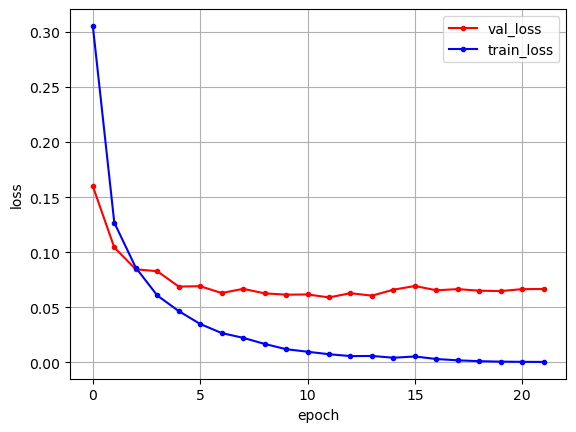

In [11]:
# val_loss와 loss 그래프로 표현
import matplotlib.pyplot as plt
import numpy

# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현

plt.plot(y_vloss, marker = '.', c = 'red', label = 'val_loss')
plt.plot(y_loss, marker = '.', c = 'blue', label = 'train_loss')
# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc = 'upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


# 모델의 가중치 저장 및 로드

In [4]:
# 전체 모델 저장
from tensorflow.keras.models import load_model

# 모델 저장


In [18]:
# 저장된 모델 불러오기


In [5]:
# 복원된 모델 평가


### 모델은 hdf5 나 h5로 보통 저장함